In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (9)\SuperheroDataset.csv")

In [4]:
df.head(1)

,Unnamed: 0.1,Unnamed: 0,Name,Url,Intelligence,Strength,Speed,Durability,Power,Combat,...,Height,Weight,Eye color,Hair color,Occupation,Base,Team Affiliation,Relatives,Skin color,Total Power
0,0,0,3-D Man,/3-d-man/10-226/,80.0,35.0,45.0,35.0,25.0,55.0,...,6'2 // 188 cm,200 lb // 90 kg,Brown,Grey,"Test pilot, adventurer",-,"Agents of Atlas, Asgardians, Formerly: Avengers","Hal Chandler (brother), Peggy Clark (sister-in...",NaN,275.0


In [5]:
df.shape

(743, 29)

In [6]:
df.isnull().sum()/df.shape[0]*100

Unnamed: 0.1         0.000000
Unnamed: 0           0.000000
Name                 0.000000
Url                  0.000000
Intelligence        10.497981
Strength            10.497981
Speed               10.497981
Durability          10.497981
Power               10.497981
Combat              10.497981
Full name            0.000000
Alter Egos           0.000000
Aliases              0.000000
Place of birth       0.000000
First appearance     0.000000
Creator              1.076716
Alignment            0.000000
Gender               0.000000
Race                 0.000000
Height               0.000000
Weight               0.000000
Eye color            0.000000
Hair color           0.134590
Occupation           0.000000
Base                 0.000000
Team Affiliation     0.000000
Relatives            0.000000
Skin color          90.040377
Total Power          0.000000
dtype: float64

In [7]:
df.drop(columns =['Unnamed: 0.1','Unnamed: 0', 'Url','Alter Egos','Aliases', 'Place of birth', 'First appearance', 'Creator', 
       'Gender', 'Race', 'Height', 'Weight', 'Eye color', 'Hair color',
       'Occupation', 'Base', 'Team Affiliation', 'Relatives', 'Skin color','Full name'],axis = 1,inplace = True)

In [8]:
df.columns

Index(['Name', 'Intelligence', 'Strength', 'Speed', 'Durability', 'Power',
       'Combat', 'Alignment', 'Total Power'],
      dtype='object')

In [9]:
df.isnull().sum()

Name             0
Intelligence    78
Strength        78
Speed           78
Durability      78
Power           78
Combat          78
Alignment        0
Total Power      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          743 non-null    object 
 1   Intelligence  665 non-null    float64
 2   Strength      665 non-null    float64
 3   Speed         665 non-null    float64
 4   Durability    665 non-null    float64
 5   Power         665 non-null    float64
 6   Combat        665 non-null    float64
 7   Alignment     743 non-null    object 
 8   Total Power   743 non-null    float64
dtypes: float64(7), object(2)
memory usage: 52.4+ KB


In [11]:
for i in df.select_dtypes(include = "float64").columns:
    df[i].fillna(df[i].mode()[0],inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11640\294155336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace = True)


In [12]:
df.isnull().sum()

Name            0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Alignment       0
Total Power     0
dtype: int64

In [13]:
df["Alignment"].value_counts()

Alignment
good       499
bad        210
neutral     28
-            6
Name: count, dtype: int64

In [14]:
df["Alignment"] = df["Alignment"].str.replace("-","good")

In [15]:
df[df["Alignment"]== "good"]

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,good,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,good,365.0
2,Abe Sapien,95.0,30.0,35.0,65.0,100.0,85.0,good,410.0
3,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,good,455.0
7,Adam Monroe,85.0,10.0,15.0,100.0,100.0,65.0,good,375.0
...,...,...,...,...,...,...,...,...,...
737,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,good,180.0
738,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,good,220.0
739,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,good,440.0
740,Yoda,95.0,55.0,35.0,25.0,100.0,90.0,good,400.0


In [16]:
good = df[df["Alignment"]== "good"]

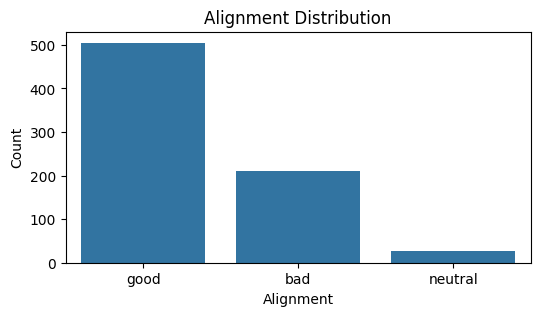

In [17]:
plt.figure(figsize=(6,3))
sns.countplot(x="Alignment", data=df)
plt.title("Alignment Distribution")
plt.xlabel("Alignment")
plt.ylabel("Count")
plt.show()

In [18]:
good.sort_values(by=["Speed"],ascending=False).head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
653,Superman,100.0,100.0,100.0,100.0,100.0,85.0,good,585.0
640,Stardust,95.0,85.0,100.0,100.0,100.0,85.0,good,565.0
622,Spectre,95.0,100.0,100.0,100.0,100.0,70.0,good,565.0
41,Ardina,85.0,100.0,100.0,80.0,100.0,25.0,good,490.0
652,Supergirl,100.0,100.0,100.0,100.0,100.0,75.0,good,575.0


In [19]:
good.sort_values(by=["Intelligence"],ascending=False).head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
629,Spider-Man,100.0,55.0,70.0,75.0,75.0,95.0,good,470.0
539,Q,100.0,15.0,20.0,100.0,100.0,40.0,good,375.0
458,Mister Fantastic,100.0,10.0,20.0,70.0,35.0,65.0,good,300.0
358,Jean Grey,100.0,80.0,25.0,20.0,95.0,70.0,good,390.0
349,Iron Man,100.0,85.0,60.0,85.0,100.0,65.0,good,495.0


In [20]:
good.sort_values(by=["Power"],ascending=False).head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
741,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,good,320.0
342,Iceman,85.0,35.0,55.0,100.0,100.0,65.0,good,440.0
301,Green Lantern,85.0,80.0,25.0,90.0,100.0,35.0,good,415.0
302,Green Lantern,75.0,90.0,55.0,65.0,100.0,65.0,good,450.0
303,Green Lantern,80.0,85.0,45.0,65.0,100.0,65.0,good,440.0


In [21]:
good_and_power_full = good[good["Power"] == 100]

In [22]:
good_and_power_full.shape

(172, 9)

In [23]:
good_and_power_full.head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
2,Abe Sapien,95.0,30.0,35.0,65.0,100.0,85.0,good,410.0
3,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,good,455.0
7,Adam Monroe,85.0,10.0,15.0,100.0,100.0,65.0,good,375.0
18,Allan Quatermain,85.0,10.0,25.0,100.0,100.0,60.0,good,0.0
23,Angel,90.0,30.0,60.0,90.0,100.0,75.0,good,445.0


In [24]:
good[good["Name"]== 'Iron Man']

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
349,Iron Man,100.0,85.0,60.0,85.0,100.0,65.0,good,495.0


In [25]:
good_and_power_full = good.sort_values(by=["Total Power"],ascending = False)

In [26]:
good_and_power_full.head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
428,Man of Miracles,100.0,100.0,100.0,100.0,100.0,100.0,good,600.0
87,Binary,95.0,100.0,100.0,100.0,100.0,100.0,good,595.0
471,Monarch,95.0,100.0,100.0,100.0,100.0,95.0,good,590.0
653,Superman,100.0,100.0,100.0,100.0,100.0,85.0,good,585.0
80,Beyonder,100.0,100.0,100.0,100.0,100.0,85.0,good,585.0


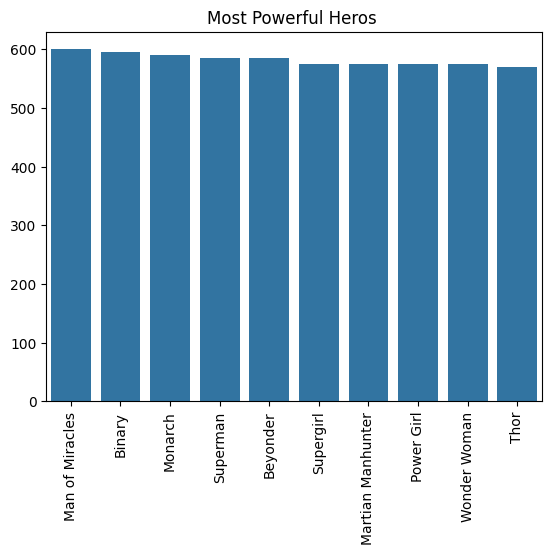

In [27]:
sns.barplot(x=list(good_and_power_full["Name"])[0:10], y=list(good_and_power_full["Total Power"])[0:10])
plt.title("Most Powerful Heros ")
plt.xticks(rotation ="vertical")
plt.show()

In [28]:
bad = df[df["Alignment"]=="bad"]

In [29]:
bad.sort_values(by=["Speed"],ascending = False).head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
742,Zoom,80.0,10.0,100.0,30.0,100.0,30.0,bad,350.0
26,Angela,95.0,100.0,100.0,100.0,100.0,100.0,bad,595.0
275,General Zod,100.0,100.0,100.0,100.0,100.0,95.0,bad,595.0
12,Air-Walker,80.0,85.0,100.0,85.0,100.0,40.0,bad,490.0
461,Mister Mxyzptlk,100.0,85.0,100.0,100.0,100.0,50.0,bad,535.0


In [30]:
bad.sort_values(by=["Intelligence"],ascending=False).head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
651,Superboy-Prime,100.0,100.0,100.0,100.0,100.0,85.0,bad,585.0
221,Doctor Doom,100.0,35.0,20.0,100.0,100.0,85.0,bad,440.0
379,Kang,100.0,50.0,60.0,70.0,100.0,70.0,bad,450.0
292,Granny Goodness,100.0,100.0,90.0,100.0,95.0,100.0,bad,585.0
370,Joker,100.0,10.0,15.0,60.0,45.0,70.0,bad,300.0


In [31]:
bad.sort_values(by=["Power"],ascending=False).head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
742,Zoom,80.0,10.0,100.0,30.0,100.0,30.0,bad,350.0
291,Gorilla Grodd,95.0,55.0,35.0,70.0,100.0,65.0,bad,420.0
612,Siren II,85.0,10.0,25.0,100.0,100.0,60.0,bad,0.0
615,Snake-Eyes,85.0,10.0,25.0,100.0,100.0,60.0,bad,0.0
275,General Zod,100.0,100.0,100.0,100.0,100.0,95.0,bad,595.0


In [32]:
bad_and_power_full = bad.sort_values(by=["Total Power"],ascending=False)

In [33]:
bad_and_power_full.head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alignment,Total Power
275,General Zod,100.0,100.0,100.0,100.0,100.0,95.0,bad,595.0
26,Angela,95.0,100.0,100.0,100.0,100.0,100.0,bad,595.0
292,Granny Goodness,100.0,100.0,90.0,100.0,95.0,100.0,bad,585.0
646,Steppenwolf,100.0,100.0,85.0,100.0,100.0,100.0,bad,585.0
651,Superboy-Prime,100.0,100.0,100.0,100.0,100.0,85.0,bad,585.0


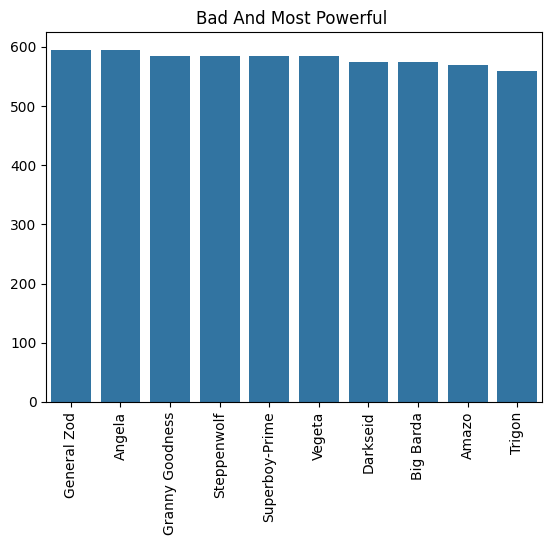

In [34]:
sns.barplot(x = list(bad_and_power_full["Name"])[0:10], y = list(bad_and_power_full["Total Power"])[0:10])
plt.title("Bad And Most Powerful ")
plt.xticks(rotation ="vertical")
plt.show()

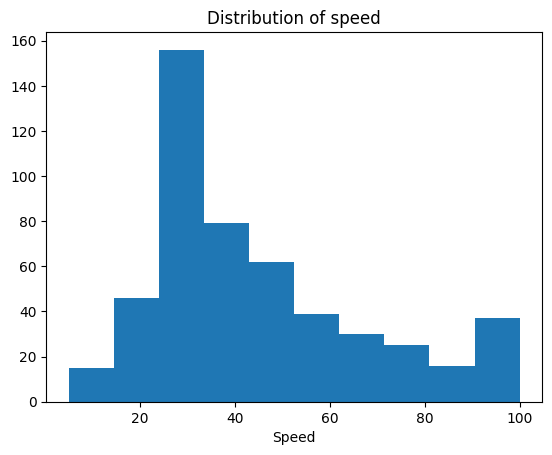

In [35]:
plt.hist(good["Speed"])
plt.title("Distribution of speed")
plt.xlabel("Speed")
plt.show()

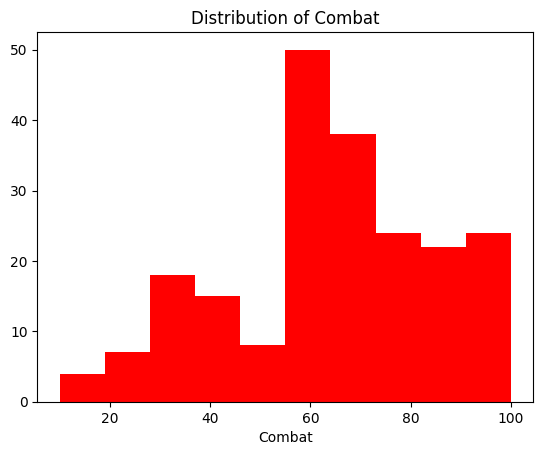

In [38]:
plt.hist(bad["Combat"],color = "red")
plt.title("Distribution of Combat")
plt.xlabel("Combat")
plt.show()